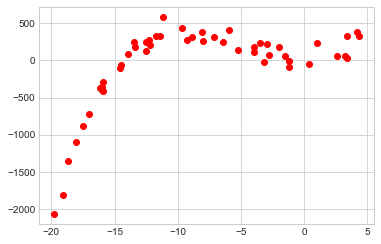

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [2]:
x=[row[0] for row in x]
y=[row[0] for row in y]
def polyfunc(M):
    curve=np.polyfit(x,y,M)
    poly=np.poly1d(curve)
    new_y=[]
    for i in x:
        y_update=poly(i)
        new_y.append(y_update)
    return new_y

In [3]:
def plotting_func(M):
    ax=plt.subplot()
    ax.plot(x,y,'ro',label='Data')
    ax.plot(x,polyfunc(M),'o',label='Polygon')
    plt.title('M =' + str(M))
    plt.xlabel('x Values')
    plt.ylabel('y Values')
    plt.legend()
    plt.show()

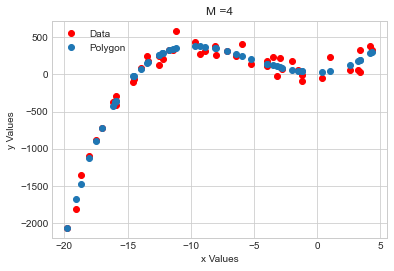

In [4]:
plotting_func(4)

In [5]:
num_of_genes = 4
sol_per_pop = 100

In [19]:
#Randomly Generation 100 Chromosome
def generate_population(n):
    chromosom_list=[]
    for i in range(n):
        chromosome = np.random.randint(low=0, high=25, size=num_of_genes)
        chromosom_list.append(chromosome)
    return chromosom_list
chromosom_list=generate_population(sol_per_pop)

In [20]:
# Badness Score
def badness_score(chromosom_list,n_best):
    badness_score_list=[]
    for gene in chromosom_list:
        mse=[]
        n=len(x)
        for a,z in zip(x,y):
            y_ga=gene[0] * a + gene[1] * a**2 + gene[2] * a**3+gene[3]
            mse_calculation=(z-y_ga)**2
            mse.append(mse_calculation)
        badness_score_list.append(sum(mse))
        
    smallest_badness_scores=np.sort(badness_score_list)
    smallest_badness_scores=smallest_badness_scores[:n_best]
    smallest_badness_scores
    return badness_score_list , smallest_badness_scores

In [21]:
# Badness Score
# def badness_score(chromosom_list,n_best):
#     error = []
#     for chr in chromosom_list:
#         poly = np.poly1d(chr)
#         preds = []
#         for i,k in zip(x,y):
#             preds.append(poly(i))
#         error.append(np.square(k - preds).mean())

#     bestData = sorted(data)[:n]
#     bestIdx  = []
#     for d in bestData:
#         bestIdx.append(data.index(d))
#     return bestIdx
# badness_score(chromosom_list,10)

In [22]:
badness_score_list,smallest_badness_scores=badness_score(chromosom_list,10)

In [23]:
badness_score_list

[89335157281.09021,
 14577661946.386183,
 21225813711.775314,
 109006850259.57663,
 91162264468.46405,
 196684286633.57153,
 208794416824.52386,
 38144736457.77381,
 4778557737.649606,
 15021580468.534672,
 52506074565.33422,
 3315702037.266839,
 16527914735.761751,
 88256742220.23659,
 4714955186.08048,
 45256303175.96485,
 103880539958.98508,
 27701329759.51858,
 81193475895.84033,
 2106804700.5693257,
 9769643635.66505,
 96800138625.3002,
 87365984830.38112,
 1203586300.145706,
 21609093323.81812,
 73125518319.20547,
 196883978674.0979,
 141018594829.48264,
 336129182.11962515,
 112032464.75576106,
 104083792245.71216,
 120222845476.536,
 175193075675.92737,
 12543821740.385952,
 118027598643.36035,
 2723316195.176851,
 15061431872.816856,
 7432979219.88006,
 35133831551.84391,
 2662260776.8570232,
 196692071247.92175,
 91714672514.11491,
 123342527000.83453,
 1910933649.8809159,
 70069623310.31209,
 136818683782.34212,
 49364075651.70296,
 104022492.65635034,
 101738804568.20001,
 

In [24]:
def best_chromosomes_list(smallest_badness_scores,badness_score_list):
    best_chromosome_index_numbers=[]
    for i in smallest_badness_scores:
        index_value=badness_score_list.index(i)
        best_chromosome_index_numbers.append(index_value)

    best_chromosomes=[]
    for i in best_chromosome_index_numbers:
        best_chromosomes.append(chromosom_list[i])

#     print('Ten Best Chromosomes \n -------------------------------------------------------------')
    return best_chromosomes

In [25]:
best_chromosomes=best_chromosomes_list(smallest_badness_scores,badness_score_list)
best_chromosomes

[array([21, 15,  1,  6]),
 array([15,  7,  1,  2]),
 array([ 6, 23,  2, 12]),
 array([ 7,  7,  0, 12]),
 array([12, 14,  0, 24]),
 array([20, 21,  0, 22]),
 array([ 5, 24,  0,  0]),
 array([16,  4,  2, 24]),
 array([12, 19,  3, 19]),
 array([22,  1,  2, 22])]

In [26]:
# Randomly Picked Singel Point Crossover Operation
def crossover(best_chromosomes):
    cross_over_genes=[]
    for l in range(len(best_chromosomes)-1):
        a=best_chromosomes[l]
        b=best_chromosomes[l+1]
        random_element = np.random.randint(low = 0, high= 4)
        a1=a[:random_element]
        a2=a[random_element:]
        b1=b[random_element:]
        b2=b[:random_element]
        offspring1=[]
        offspring2=[]
        for i in range(len(a1)):
            offspring1.append(a1[i])
            offspring2.append(b2[i])
        for k in range(len(b1)):
            offspring1.append(b1[k])
            offspring2.append(a2[k])
        cross_over_genes.append(offspring1)
        cross_over_genes.append(offspring2)
    return cross_over_genes
crossover_list=np.array(crossover(best_chromosomes))
crossover_list

array([[21, 15,  1,  2],
       [15,  7,  1,  6],
       [15, 23,  2, 12],
       [ 6,  7,  1,  2],
       [ 6, 23,  2, 12],
       [ 7,  7,  0, 12],
       [ 7, 14,  0, 24],
       [12,  7,  0, 12],
       [12, 14,  0, 22],
       [20, 21,  0, 24],
       [20, 24,  0,  0],
       [ 5, 21,  0, 22],
       [ 5, 24,  2, 24],
       [16,  4,  0,  0],
       [16,  4,  3, 19],
       [12, 19,  2, 24],
       [12, 19,  2, 22],
       [22,  1,  3, 19]])

In [27]:
def mutation(best_chromosomes):
    mutated_chromosomes=[]
    for gene in best_chromosomes:
        new_gene=gene
        #Picking a random element in the gene
        random_element = np.random.randint(low = 0, high= 4)     
        #Mutation operation--Multiplying Random Element with Random Floating Number
        mutated_gene = new_gene[random_element] * np.random.uniform(0.0, 2.0)
        new_gene[random_element]=mutated_gene     
        mutated_chromosomes.append(new_gene)
    return mutated_chromosomes      
mutated_genes=np.array(mutation(crossover_list))
mutated_genes

array([[21, 15,  1,  2],
       [ 7,  7,  1,  6],
       [18, 23,  2, 12],
       [ 6,  7,  1,  2],
       [ 6, 23,  1, 12],
       [ 7,  1,  0, 12],
       [ 2, 14,  0, 24],
       [12, 11,  0, 12],
       [12,  6,  0, 22],
       [13, 21,  0, 24],
       [20, 24,  0,  0],
       [ 5, 21,  0, 39],
       [ 5, 24,  2, 20],
       [16,  7,  0,  0],
       [16,  3,  3, 19],
       [ 8, 19,  2, 24],
       [12,  5,  2, 22],
       [22,  1,  3, 14]])

In [28]:
iteration=500
population=generate_population(100)

def GA(population,iteration):
    MSE=[]
    Best_Possible_Genes=[]
    for i in range(iteration):
        n_best=10
        badness_score_list , smallest_badness_scores=badness_score(population,n_best)
        best_chromosomes=best_chromosomes_list(smallest_badness_scores,badness_score_list)

        generated_genes=[]
        crossover_generating_genes=crossover(best_chromosomes)
        mutation_generating_genes=mutation(crossover_generating_genes)
        for i in crossover_generating_genes:
            generated_genes.append(i)
        for k in mutation_generating_genes:
            generated_genes.append(k)

        best_badness_score_list , best_badness_scores=badness_score(generated_genes,1)
        best_chromosomes=best_chromosomes_list(best_badness_scores,best_badness_score_list)

        MSE.append(best_badness_scores)
        Best_Possible_Genes.append(best_chromosomes)
        
    #Finding Smallest Error
    MSE=[row[0] for row in MSE]
    smallest_MSE=np.sort(MSE)
    best_valu_index=MSE.index(smallest_MSE[0])
    
    #Finding Best Possible Gene
    best_gene=Best_Possible_Genes[best_valu_index]
    best_gene=best_gene[0]
    return best_gene
best_gene=GA(population,iteration)
best_gene

array([ 6, 20, 13,  5])

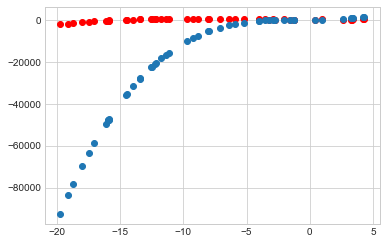

In [29]:
y_ga=[]
for i in x:
    a = best_gene[0] * i + best_gene[1] * i**2 + best_gene[2] * i**3+best_gene[3]
    y_ga.append(a)
plt.plot(x,y,'ro')
plt.plot(x,y_ga,'o')

In [32]:
list(range(0,10,2))

[0, 2, 4, 6, 8]